### Imports

Alle wichtigen Imports die für dieses Notebook benötigt werden:

In [8]:
print("Versions of the imported modules:")
import pandas as pd
print('pandas:', pd.__version__)
import numpy as np
print('numpy:', np.__version__)
import seaborn as sns
print('seaborn:', sns.__version__)
import re
print('Regex:', re.__version__)
import requests
print('Request:', requests.__version__)


##############################################
from pathlib import Path
# print('pathlib:', Path.__version__)
import matplotlib.pyplot as plt
# print('matplotlib:', plt.__version__)


import os

Versions of the imported modules:
pandas: 2.2.1
numpy: 1.26.4
seaborn: 0.13.2
Regex: 2.2.1
Request: 2.31.0


### Introducing

This notebook implements the prediction of titanic survivors. A training dataset `train.csv` with 918 passengers including survival status is used to learn a prediction function. A test set `test.csv` contains 418 passengers and will be used to predict their survival.

Your results must be reproducible - please **don't overlook the rules for `random_state`** in the body of this notebook to obtain full credit for your .

### Load Datasets

In [9]:
data_path = Path.cwd()

# Laden der Trainingsdaten
train_data = pd.read_csv(data_path/'../csv/original_data/train.csv', index_col=0)
train_data = train_data.reset_index() #um Id zu behalten als spalte

# Laden der Testdaten
test_data = pd.read_csv(data_path/'../csv/original_data/test.csv', index_col=0)
test_data = test_data.reset_index() #um Id zu behalten als spalte

# Markiere die Datensätze als 'Train' oder 'Test'
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'

# Kombiniere beide Datensätze
feature_engineering_df = pd.concat([train_data, test_data], ignore_index=True)

# Ersetze NaN Werte nur in der 'Survived' Spalte mit 2
feature_engineering_df['Survived'].fillna(2, inplace=True)

feature_engineering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Dataset      1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


C:\Users\Ivan\AppData\Local\Temp\ipykernel_387216\3855825576.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feature_engineering_df['Survived'].fillna(2, inplace=True)


### Data Exploration

In [10]:
feature_engineering_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.899924,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.853975,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,1.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,2.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,2.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Plot survial ratio

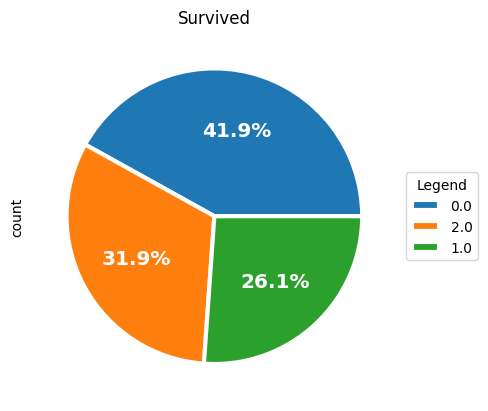

In [11]:
# Your existing code for the pie chart
pie_chart = feature_engineering_df.Survived.value_counts().plot.pie(autopct='%.1f%%', 
                                                wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, 
                                                textprops=dict(size='x-large', color='white', fontweight='bold'))
pie_chart.set_title('Survived')

# Adding the legend
# Assuming the index of your series has the meaningful labels you want to use
labels = feature_engineering_df.Survived.value_counts().index
plt.legend(labels, title="Legend", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


Survival ratio per Pclass

In [12]:
feature_engineering_df.groupby(['Pclass']).Survived.agg(Survivor_ratio='mean', Passengers='size')

,Survivor_ratio,Passengers
Pclass,,
1,1.083591,323
2,0.985560,277
3,0.782793,709


Boxplot for Age

<Axes: xlabel='Survived', ylabel='Age'>

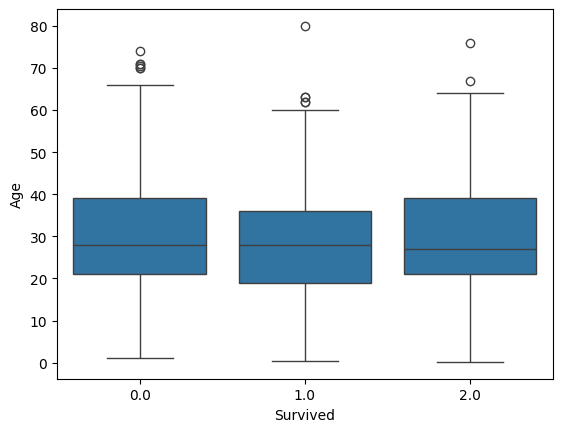

In [13]:
#train_data.set_index('Survived', append=True)['Age'].unstack().boxplot()
sns.boxplot(feature_engineering_df, x='Survived', y='Age')

### Prepair Dataframe

In [14]:
feature_engineering_df.to_csv(data_path/'../csv/pre_processed_data/train_test.csv', index=False)